# SCRAPING STOCK HEADLINE NEWS AND SENTIMENT ANALYSIS 

**Problem Description**

Stock markets tend to react very quickly to breaking news. Negative news will cause people to sell stocks and otherwise. By analyzing the sentiment/attitude toward stocks from news articles, social media, or financial reports, investors can extract insights and make data-driven decisions about whether to buy or sell a stock. 

In this project, we will scrape headline news from the financial website www.cnbc.com for three big stocks AMAZON,TESLA, and APPLE. Then we perform sentiment analysis based on scraped headline data to determine sentiment toward stock is positive, neutral, or negative. 

**Business Objectives:** Scraping Headline News and Performing Sentiment Analysis

**Data Source:** https://www.cnbc.com/

**Data Mining Method:** Selenium package and NLTK package are used for data scraping and sentiment analysis respecitively.

**Scraping Data**

Selenium is an amazing package that we can use to extract content from websites. Instead of copying and pasting every headline manually, we can parse website links and extract information quickly in a few lines of code.

In [149]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [37]:
#Function to scrape news about stocks on CNBC website
def scrape_news(stock):
    browser = webdriver.Chrome(ChromeDriverManager().install())
    cnbc_url = "https://www.cnbc.com/search/?query="
    stock = stock
    browser.get(cnbc_url + stock)
    #keep the browser
    time.sleep(45)
    headline = browser.find_elements(by=By.CLASS_NAME, value='SearchResult-searchResultPreview')
    headline_date = browser.find_elements(by=By.CLASS_NAME, value='SearchResult-publishedDate')
    #convert headline to list and create dataframe
    headline_list = [x.text for x in headline]
    headline_date_list = [x.text for x in headline_date]
    df = pd.DataFrame({'headline': headline_list, 'date': headline_date_list})
    return df


In [147]:
#Scrape news for AMAZON
df_AMAZON = scrape_news('AMAZON')
df_AMAZON['company'] = 'AMAZON'
df_AMAZON.head()


,headline,date,company
0,"Brent Thill, Jefferies, joins ‘TechCheck’ to d...",12/5/2022 6:35:38 PM,AMAZON
1,Amazon Web Services has been the biggest growt...,12/3/2022 4:00:01 PM,AMAZON
2,Here are Monday’s biggest calls on Wall Street...,12/5/2022 2:50:13 PM,AMAZON
3,Jeff Blackburn is retiring for the second time...,12/2/2022 7:32:07 PM,AMAZON
4,Running one of the world’s biggest companies —...,12/1/2022 6:35:29 PM,AMAZON


In [146]:
#Scrape news for TESLA
df_TESLA = scrape_news('TESLA')
df_TESLA['company'] = 'TESLA'
df_TESLA.head()

,headline,date,company
0,Here are Tuesday’s biggest calls on Wall Stree...,12/6/2022 2:38:40 PM,TESLA
1,‘Mad Money’ host Jim Cramer and the ‘Squawk on...,12/5/2022 4:22:39 PM,TESLA
2,Tesla plans to cut December output of the Mode...,12/5/2022 1:31:11 PM,TESLA
3,Check out the companies making headlines in mi...,12/5/2022 6:08:31 PM,TESLA
4,Here are Monday’s biggest calls on Wall Street...,12/5/2022 2:50:13 PM,TESLA


In [148]:
#Scrape news for APPLE
df_APPLE = scrape_news('APPLE')
df_APPLE['company'] = 'APPLE'
df_APPLE.head()

,headline,date,company
0,Apple on Tuesday announced a new karaoke servi...,12/6/2022 5:19:37 PM,APPLE
1,U.K.-based consumer tech company Nothing is se...,12/5/2022 7:28:34 AM,APPLE
2,Here are Tuesday’s biggest calls on Wall Stree...,12/6/2022 2:38:40 PM,APPLE
3,CNBC’s Steve Kovach and Seema Mody discuss a W...,12/5/2022 7:53:28 PM,APPLE
4,"CNBC’s ‘Halftime Report’ investment committee,...",12/5/2022 7:03:45 PM,APPLE


In [150]:
#combine all dataframes
df = pd.concat([df_AMAZON, df_TESLA, df_APPLE], ignore_index=True)

#drop duplicates
df.drop_duplicates(subset ="headline", keep = False, inplace = True)

In [151]:
#df.to_csv('news.csv', index=False)
df.tail()

,headline,date,company
2173,"What I’m looking at April 1, 2022Goldman Sachs...",4/1/2022 2:13:08 PM,APPLE
2174,CNBC’s Steve Kovach joins ‘The Exchange’ to re...,6/28/2022 6:36:27 PM,APPLE
2177,Here are Wednesday’s biggest analyst calls on ...,4/20/2022 1:39:22 PM,APPLE
2178,CNBC’s Sara Eisen reports on news from Apple.,4/20/2022 9:00:37 PM,APPLE
2179,Apple capped off a stunning rise on Monday whe...,1/4/2022 12:12:01 AM,APPLE


In [152]:
#Remove the special characters from the headline (apart from a-z and A-Z replace everything with blank)
df['headline'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#convert headline to lower case and string
df['headline'] = df['headline'].str.lower()
df['headline'] = df['headline'].astype(str)

df.dropna(inplace=True)

# split date column in date and time
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

df.head()

,headline,date,company
0,brent thill jefferies joins techcheck to d...,2022-12-05,AMAZON
1,amazon web services has been the biggest growt...,2022-12-03,AMAZON
3,jeff blackburn is retiring for the second time...,2022-12-02,AMAZON
4,running one of the world s biggest companies ...,2022-12-01,AMAZON
5,amazon amzn could potentially spin off its p...,2022-11-30,AMAZON


In [153]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

**SENTIMENT ANALYSIS**

Sentiment analysis is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral. This technique is used to discover the meaning behind texts, images or other types of data. The sentiment score ranges from 0 to 1. The higher the score the more positive the data. This project uses NLTK package to calculate sentiment score of each headline then visualizes by bar plot

In [154]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download() #download vader_lexicon
#sentiment score for each headline
vader = SentimentIntensityAnalyzer()
scores = df['headline'].apply(vader.polarity_scores).tolist()
#convert scores to dataframe
scores_df = pd.DataFrame(scores)
#join scores to original dataframe
df = df.join(scores_df, rsuffix='_right')

#group by date and company and calculate the mean of the compound score
df = df.groupby(['date', 'company']).mean().reset_index()

df.head()

,date,company,neg,neu,pos,compound
0,2021-07-08,TESLA,0.170,0.8300,0.0000,-0.59940
1,2021-07-10,TESLA,0.000,1.0000,0.0000,0.00000
2,2021-07-26,TESLA,0.000,0.9290,0.0710,0.21075
3,2021-07-27,TESLA,0.057,0.9065,0.0365,-0.12500
4,2021-07-30,TESLA,0.000,1.0000,0.0000,0.00000


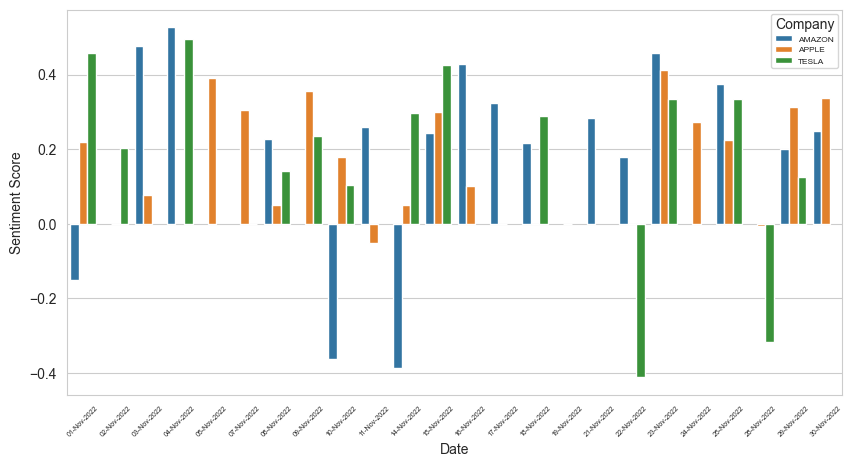

In [166]:
#plot sentiment score for 3 companies in November 2021
import warnings
import seaborn as sns

#filter data in November 2021
from datetime import datetime
startdate = datetime.strptime("2022-11-01", "%Y-%m-%d")
enddate = datetime.strptime("2022-11-30", "%Y-%m-%d")
data = df[(df['date'] >= startdate) & (df['date'] <= enddate)]
data['date'] = data['date'].dt.strftime('%d-%b-%Y')
#plot sentiment score for 3 companies in November 2021
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='date', y='compound', data=data, hue ='company')
plt.xticks(rotation=45, size=5)
warnings.filterwarnings('ignore')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(loc='upper right', fontsize=6, title='Company')

Based on the bar chart above, you can understand the sentiment/attitude that investors have about company stocks (Amazon, Tesla, Apple) and discover events that cause sentiment negative. Overall, the sentiment scores for all three stocks during Nov 2022 are positive. However, Amazon received a negative score on 14 Nov 2022 because of its plan to lay off about 10,000 employees. Attitudes toward Tesla stock became negative at the end of Nov 2022 due to concerns about a stock pullback.  